In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
titanic=pd.read_csv(r"Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.drop(columns=['Name','Cabin','Ticket','PassengerId'],inplace=True)

In [9]:
titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})
titanic.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\4050813936.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Sex']=titanic['Sex'].replace({'male':1,'female':0})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [10]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\2710818101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
titanic.isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\2934234922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})
titanic.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2932\892169521.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['Embarked']=titanic['Embarked'].replace({'S':1,'C':2,'Q':3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [13]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


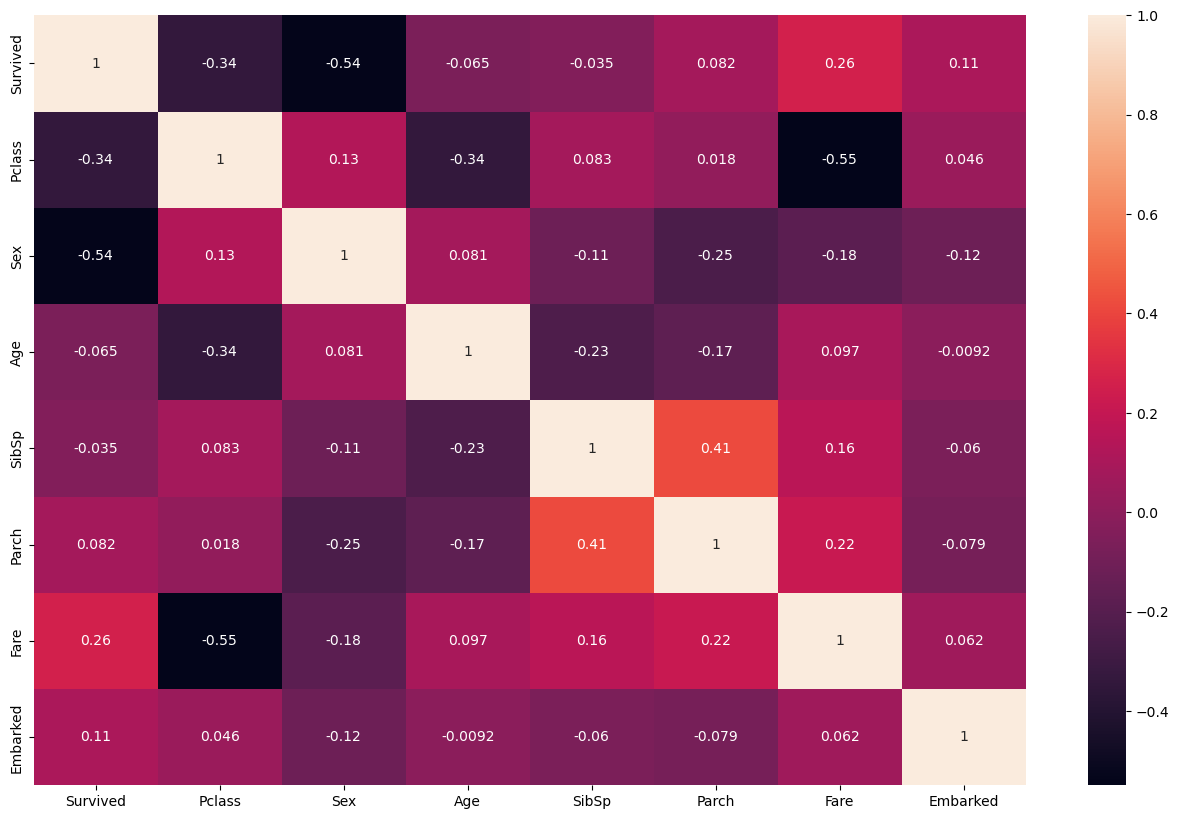

In [14]:
plt.figure(figsize=(16, 10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

In [15]:
x=titanic.drop(columns='Survived')
y=titanic['Survived']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
x_train,x_test

(     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 331       1    1  45.5      0      0   28.5000         1
 733       2    1  23.0      0      0   13.0000         1
 382       3    1  32.0      0      0    7.9250         1
 704       3    1  26.0      1      0    7.8542         1
 813       3    0   6.0      4      2   31.2750         1
 ..      ...  ...   ...    ...    ...       ...       ...
 106       3    0  21.0      0      0    7.6500         1
 270       1    1  28.0      0      0   31.0000         1
 860       3    1  41.0      2      0   14.1083         1
 435       1    0  14.0      1      2  120.0000         1
 102       1    1  21.0      0      1   77.2875         1
 
 [712 rows x 7 columns],
      Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 709       3    1  28.0      1      1  15.2458         2
 439       2    1  31.0      0      0  10.5000         1
 840       3    1  20.0      0      0   7.9250         1
 720       2    0   6.0      0      1  33.0000   

In [18]:
y_train,y_test

(331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 712, dtype: int64,
 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 433    0
 773    0
 25     1
 84     1
 10     1
 Name: Survived, Length: 179, dtype: int64)

In [19]:
lr=LogisticRegression()

In [20]:
lr.fit(x_train,y_train)

C:\AnaconaC\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = lr.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
(f"Accuracy: {accuracy * 100:.2f}%")

'Accuracy: 79.89%'

<function matplotlib.pyplot.show(close=None, block=None)>

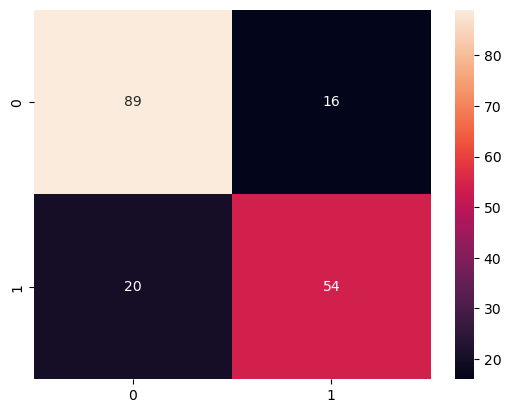

In [37]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show

In [38]:
(classification_report(y_test,y_pred))

'              precision    recall  f1-score   support\n\n           0       0.82      0.85      0.83       105\n           1       0.77      0.73      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'